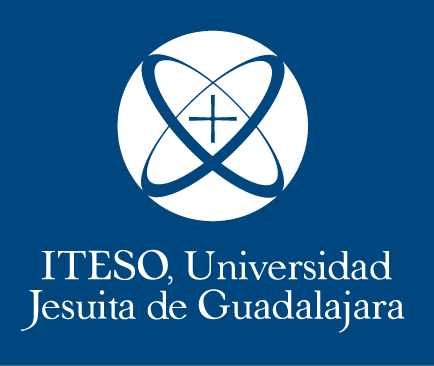

## <center> Quantitative Finance S. 2022 <center/>
## <center> Professor José Mario Zárate <center/>
### <center> Homework 4 <center/>

### <center> López Lazareno Diego Alberto IF722100 <center/>

## Homework 4.1

Use the code developed in class.

1. Select a company and retrieve at least 10 year stock price data. 
2. Validate the Test $1$, Test $2$, Test $3$ and theoretical equation $\bar{R}_t - 0.5 * S^2 = \bar{r}_t$
3. Use ML to find the PDF for $r_t$ and $R_t$.
4. Add comments or conclusions.

In [1]:
# Settings
import warnings
warnings.filterwarnings("ignore")

# Required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from scipy import stats as st
from fitter import Fitter, get_distributions
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Functions

def plot(data : "Data", size : "Figsize", color : "Plot color", title : "Plot title"):
    """
    plot returns a time series plot and a histogram for the given data.
    
    """
  
    fig, axes = plt.subplots(1, 2, figsize = size)
    fig.suptitle(title)
    sns.lineplot(data = data, ax = axes[0], color = color)
    sns.histplot(x = data, ax = axes[1], kde = True, color = color);    
    
def leveneTest(data1 : "Sample 1", data2 : "Sample 2", significanceLevel : "Significance level"):
    """
    leveneTest tests the null hypothesis that all input samples are from populations with equal variances. 
    Reference: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html
    
    """
   
    t, pvalue = st.levene(data1, data2)
    
    if pvalue >= significanceLevel:
        print("Fail to reject the null hypothesis: the two samples are from populations with equal variances")
        
    else:
        print("Reject the null hypothesis: the two samples aren't from populations with equal variances")
                
def twoSampleTTest(data1 : "Sample 1", data2 : "Sample 2", significanceLevel : "Significance level"):
    """
    twoSampleTTest tests the null hypothesis that 2 independent samples have identical average (expected) values.
    Reference: https://het.as.utexas.edu/HET/Software/Scipy/generated/scipy.stats.ttest_ind.html
    
    """
    
    t, pvalue = st.ttest_ind(data1, data2, equal_var = True)
    
    if pvalue >= significanceLevel:
        print("Fail to reject the null hypothesis: the two samples have identical average values")
        
    else:
        print("Reject the null hypothesis: the two samples don't have identical average values")
        
def normalTest(data : "Sample", significanceLevel : "Significance level"):
    """
    normalTest tests the null hypothesis that a sample comes from a normal distribution.
    Reference: http://scipy.github.io/devdocs/reference/generated/scipy.stats.normaltest.html
    
    """
    
    t, pvalue = st.normaltest(data)
    
    if pvalue >= significanceLevel:
        print("Fail to reject the null hypothesis: the sample comes from a normal distribution")
        
    else:
        print("Reject the null hypothesis: the sample doesn´t come from a normal distribution")
        

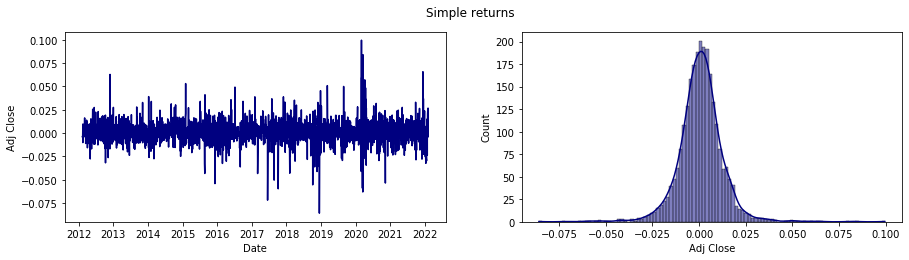

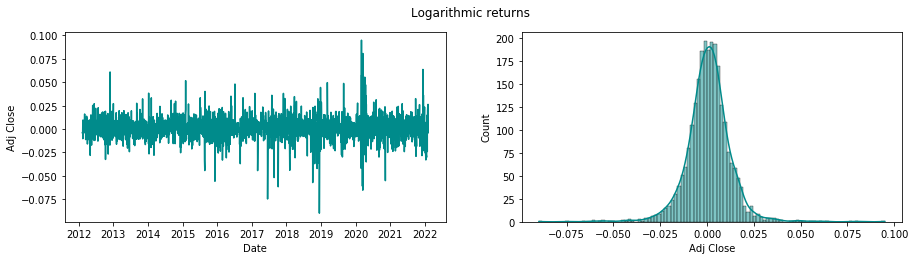

In [2]:
# Company: Costo Wholesale Corp.
ticker = "COST" 
end = dt.datetime.today()
start = end - dt.timedelta(10 * 365)
data = yf.download(ticker, start = start, end = end, progress = False)["Adj Close"].dropna()

# Simple returns
R_t = data.pct_change().dropna()
plot(R_t, (15, 3.5), "navy", "Simple returns")

# Logarithmic returns
r_t = np.log(data / data.shift(1)).dropna()
plot(r_t, (15, 3.5), "darkcyan", "Logarithmic returns")

### Test 1: Levene Test

In [3]:
leveneTest(R_t, r_t, 0.05)

Fail to reject the null hypothesis: the two samples are from populations with equal variances


### Test 2: Two Sample T-Test

In [4]:
twoSampleTTest(R_t, r_t, 0.05)

Fail to reject the null hypothesis: the two samples have identical average values


### Test 3: Normal Distribution (Simple Returns)

In [5]:
normalTest(R_t, 0.05)

Reject the null hypothesis: the sample doesn´t come from a normal distribution


### Test 3: Normal Distribution (Logarithmic Returns)

In [6]:
normalTest(r_t, 0.05)

Reject the null hypothesis: the sample doesn´t come from a normal distribution


### Theoretical Equation

In [7]:
np.mean(R_t) - 0.5 * np.var(r_t), np.mean(r_t)

(0.0008298161046340138, 0.0008294053512011045)

In [8]:
np.mean(R_t) - 0.5 * np.var(r_t) - np.mean(r_t)

4.10753432909328e-07

The theoretical equation is only valid up to the seventh decimal. Which means that, in practical terms, the mathematical equality is valid for the selected stock (Costco).

### PDF (Simple Returns)

,sumsquare_error,aic,bic,kl_div
t,53.858269,197.975121,-9638.503064,inf
johnsonsu,61.903723,218.017281,-9280.663360,inf
hypsecant,71.489907,413.389119,-8934.367054,inf
dgamma,110.158687,369.005345,-7839.570154,inf
dweibull,150.209560,376.551786,-7059.955009,inf


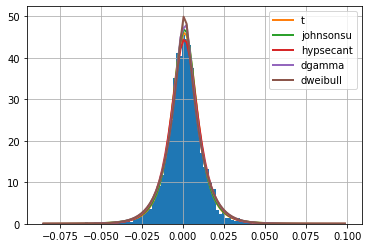

In [9]:
dist = get_distributions() 
f1 = Fitter(R_t, distributions = dist)
f1.fit()
f1.summary()

In [10]:
parameters1 = getattr(st, f1.summary(plot = False).index[0]).fit(R_t)
parameters1

(3.5334917488233923, 0.0009250641026561106, 0.008059820144670566)

The probability density function that best fits the simple returns is $t$, with the next parameters:

+ df = $3.5334$
+ loc = $0.0009$
+ scale = $0.0080$


### PDF (Logarithmic Returns)

,sumsquare_error,aic,bic,kl_div
hypsecant,75.365179,403.861770,-8801.655308,inf
dgamma,117.932657,360.086819,-7668.135911,inf
genlogistic,160.495717,521.162255,-6893.438021,inf
dweibull,167.534041,365.971633,-6785.538900,inf
logistic,169.063761,527.580732,-6770.517858,inf


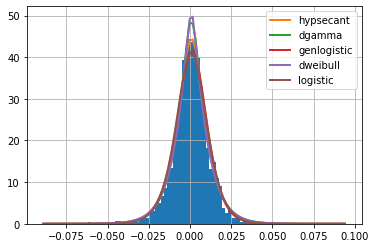

In [11]:
f2 = Fitter(r_t, distributions = dist)
f2.fit()
f2.summary()

In [12]:
parameters2 = getattr(st, f2.summary(plot = False).index[0]).fit(r_t)
parameters2

(0.0009085335875739751, 0.007155508057230515)

The probability density function that best fits the simple returns is $hypsecant$, with the next parameters:

+ loc = $0.0009$
+ scale = $0.0071$


### Conclusions (Costco Stock)

1. In first instance, we can say that both returns (simple and logarithmic) are practically similar according to the visual tests (time series graph and histogram). 
2. Levene's statistical test confirms that both time series (simple returns and logarithmic returns) have the same variance. 
3. The two-sample t-test verifies that both time series (simple returns and logarithmic returns) have the same mean. 
4. When applying the normality test, the evidence obtained shows that both time series (simple returns and logarithmic returns) do not come from a normal distribution. 
5. Strictly speaking, the theoretical equation is not fulfilled, since it does not yield $0$, this is to be expected, since both time series (simple returns and logarithmic returns) do not come from a normal distribution. However, in practical terms we can say that the equation is true up to the seventh decimal. 
6. The probability density function that best fits simple returns is the $t$ distribution. On the other hand, the probability density function that best fits logarithmic returns is the $hypsecant$ distribution. It was to be expected that the normal distribution was not chosen, since we had previously verified that both time series did not come from a distribution with such characteristics.  
7. As we saw earlier, Costco stock's returns do not come from a normal distribution, so using models built from the normality assumptions for this particular case would not be appropriate. 